In [1]:
import cv2
from pathlib import Path
from random import *
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
   tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
result = list(file.absolute().as_posix() for file in list(Path("C:/Users/Moh.Massoud/Desktop/test/data/test").rglob("*.[pP][nN][gG]") ) )
test_images = []
for img_path in result:
    img = cv2.imread(img_path, 0)
    resized = cv2.resize(img, (224,224))
    test_images.append(resized)
test_images = np.asanyarray(test_images)
test_labels = np.asanyarray(list(int(name[:62][-1]) for name in result))
test_images = np.expand_dims(test_images, axis=3)

In [4]:
result = list(file.absolute().as_posix() for file in list(Path("C:/Users/Moh.Massoud/Desktop/test/data/train").rglob("*.[pP][nN][gG]") ) )
train_images = []
for img_path in result:
    img = cv2.imread(img_path, 0)
    resized = cv2.resize(img, (224,224))
    train_images.append(resized)
train_images = np.asanyarray(train_images)
train_labels = np.asanyarray(list(int(name[:63][-1]) for name in result))
train_images = np.expand_dims(train_images, axis=3)

In [44]:
model = keras.Sequential([
    keras.layers.Conv2D(filters=96, input_shape=(224,224,1), kernel_size=(11,11), strides=(4,4), padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    keras.layers.Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(4096, activation='relu'),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(1000, activation='relu'),
    #keras.layers.Dropout(0.4),
    keras.layers.Dense(2, activation='softmax')
])

In [45]:
model.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
model.fit(train_images, train_labels, epochs=5)

Train on 70000 samples
Epoch 1/5
70000/70000 [==============================] - 57s 817us/sample - loss: 152.6836 - accuracy: 0.7157
Epoch 2/5
70000/70000 [==============================] - 56s 796us/sample - loss: 0.2810 - accuracy: 0.9156
Epoch 3/5
70000/70000 [==============================] - 56s 800us/sample - loss: 0.4851 - accuracy: 0.9366
Epoch 4/5
70000/70000 [==============================] - 56s 798us/sample - loss: 0.2234 - accuracy: 0.9431
Epoch 5/5
70000/70000 [==============================] - 56s 798us/sample - loss: 0.2063 - accuracy: 0.9455


In [47]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

14898/14898 - 3s - loss: 0.1341 - accuracy: 0.9657


In [9]:
model.save('DrowsinessDetectionAlexNet.h5')

In [10]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(2), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


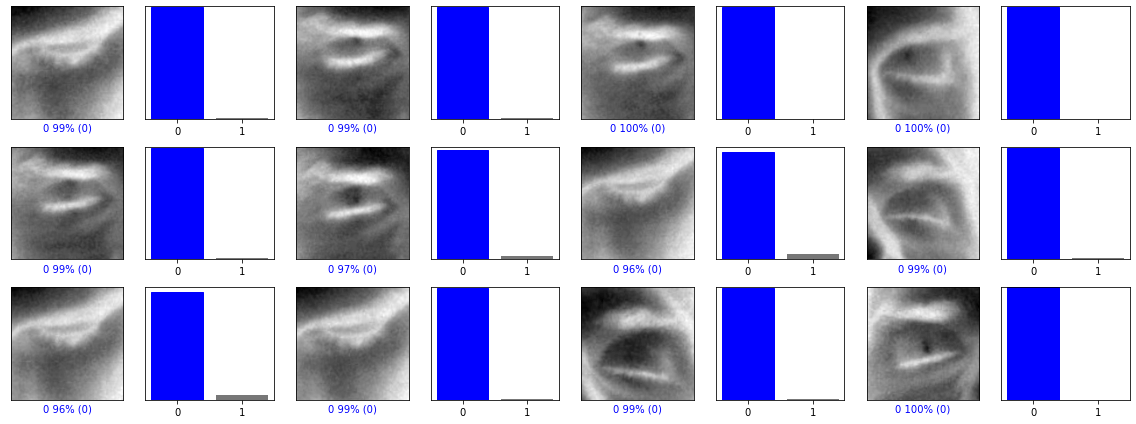

In [11]:
num_rows = 3
num_cols = 4
num_images = num_rows*num_cols
predictions = model.predict(test_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [12]:
import copy

def removePlotterAxes():
    plt.figure()
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pass

def multiPlot(imgs, figsize, no_rows, no_cols):
    plt.figure(figsize = figsize)
    for j in range(len(imgs)):
        plt.subplot(no_rows, no_cols, j+1)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(imgs[j])

def plotImg(img):
    removePlotterAxes()
    plt.imshow(img)
    pass

def detect(img_path):
    img = cv2.imread(img_path)
    imgToCrop = copy.copy(img)
    #plotImg(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

    roi = []
    face_imgs = []
    eye_imgs = []
    faces = faceCascade.detectMultiScale(imgToCrop, 1.1, 16)
    for(x, y, w, h) in faces:
        roi.append(imgToCrop[y:y+h, x:x+w])
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    #plotImg(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

    for j in range(len(roi)):
        face_imgs.append(cv2.cvtColor(roi[j], cv2.COLOR_BGR2RGB))

    eyes = None
    for face in face_imgs:
        #plotImg(face)
        img = face
        imgToCrop = copy.copy(img)
        roi = []
        eyes = eyeCascade.detectMultiScale(face, 1.1, 16)
        for(x, y, w, h) in eyes:
            roi.append(cv2.resize(cv2.cvtColor(imgToCrop[y:y+h, x:x+w], cv2.COLOR_BGR2GRAY), (224,224)))
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        #plotImg(img)
        if eyes is not None:    
            multiPlot(roi, [2, 2], 1, len(eyes))
        
    return np.asanyarray(roi)

In [13]:
model = keras.models.load_model('DrowsinessDetectionAlexNet.h5')

(2, 224, 224, 1)


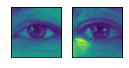

In [15]:
test_images = detect('C:/Users/Moh.Massoud/ML/image.jpg')
test_images = np.expand_dims(test_images, axis=3)
test_labels = [1,1]
print(test_images.shape)

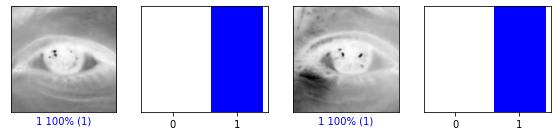

In [16]:
num_rows = 1
num_cols = 2
num_images = num_rows*num_cols
predictions = model.predict(test_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()